In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pymc_marketing.mmm import MMM

warnings.filterwarnings("ignore")

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
mmm = MMM.load("model.nc")

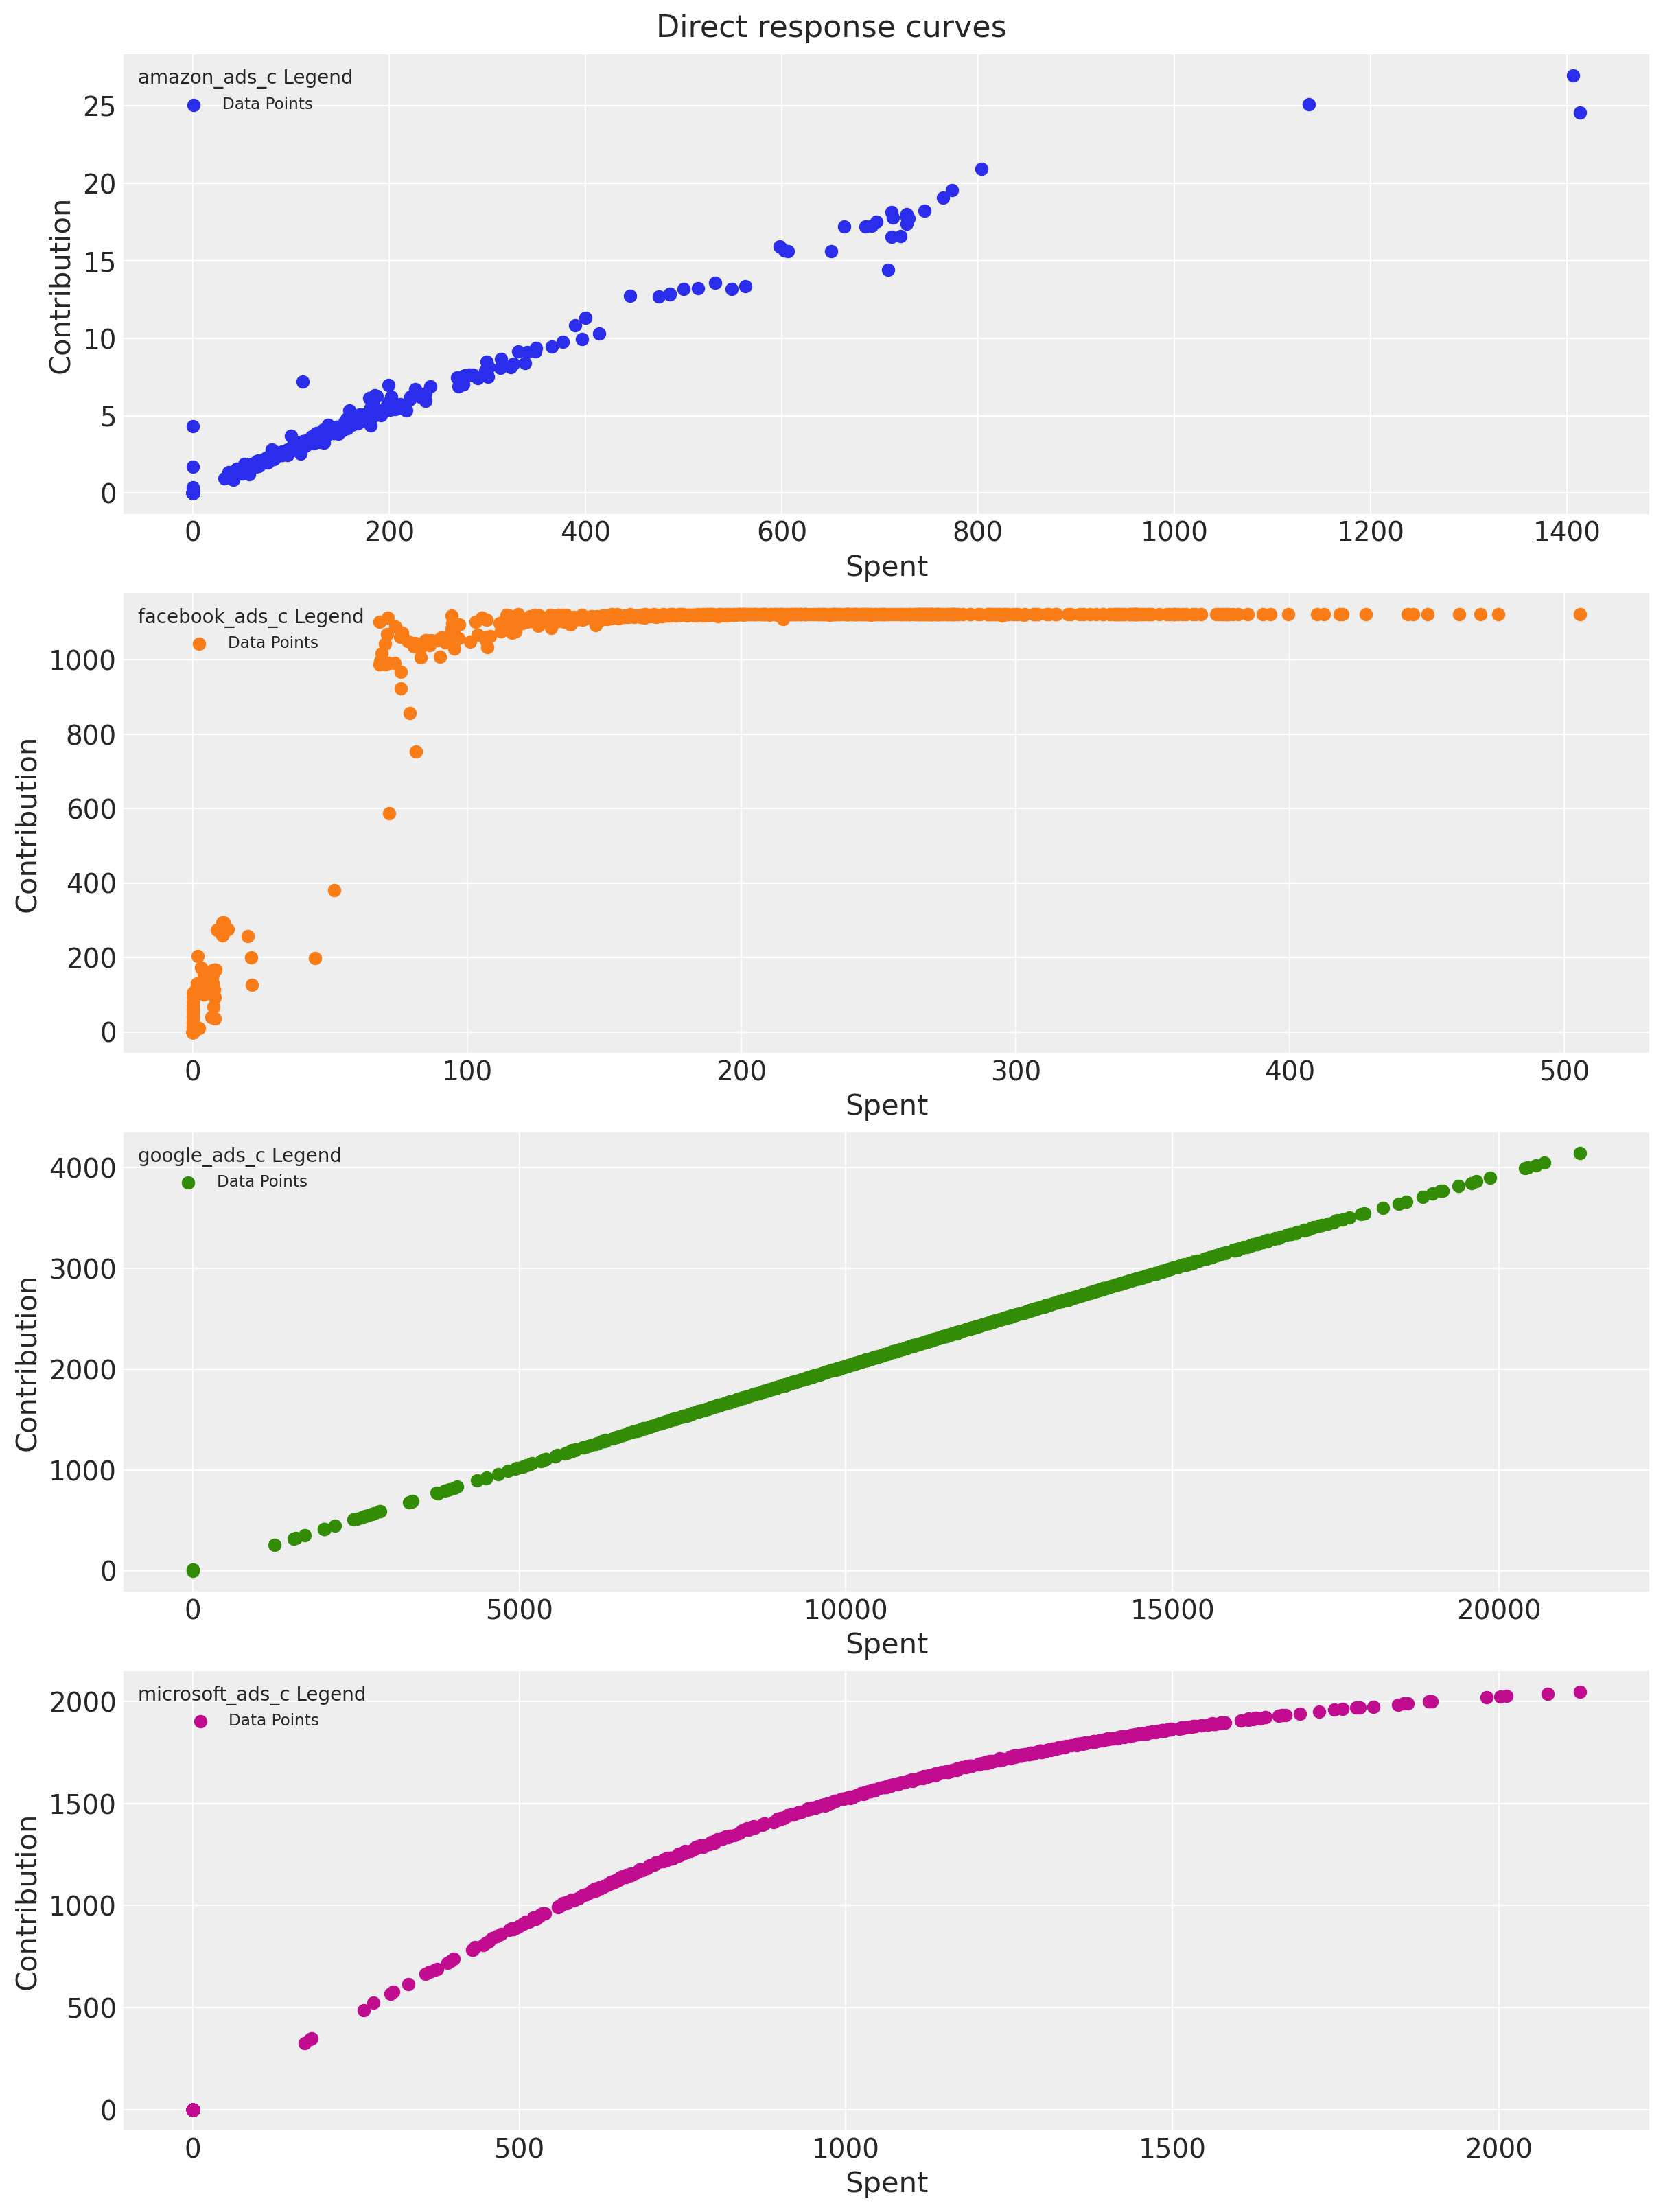

In [3]:
response_curve_fig = mmm.plot_direct_contribution_curves();

In [4]:
az.summary(
    data=mmm.fit_result,
    var_names=[
        "saturation_beta",
        "saturation_lam",
        "adstock_alpha",
    ],
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
saturation_beta[amazon_ads_c],0.007,0.007,0.000,0.020,0.000,0.000,2871.0,1989.0,1.0
saturation_beta[facebook_ads_c],0.154,0.011,0.133,0.174,0.000,0.000,2031.0,2381.0,1.0
saturation_beta[google_ads_c],1.901,0.910,0.823,3.560,0.023,0.017,2133.0,1973.0,1.0
saturation_beta[microsoft_ads_c],0.294,0.017,0.264,0.324,0.000,0.000,1968.0,2460.0,1.0
saturation_lam[amazon_ads_c],2.213,1.445,0.115,4.841,0.020,0.016,4572.0,2879.0,1.0
saturation_lam[facebook_ads_c],20.176,1.851,16.939,23.735,0.025,0.018,5856.0,2792.0,1.0
saturation_lam[google_ads_c],0.740,0.279,0.225,1.223,0.006,0.004,2159.0,1898.0,1.0
saturation_lam[microsoft_ads_c],3.811,0.349,3.139,4.456,0.007,0.005,2792.0,2512.0,1.0
adstock_alpha[amazon_ads_c],0.252,0.189,0.000,0.592,0.002,0.002,5060.0,1974.0,1.0
adstock_alpha[facebook_ads_c],0.864,0.085,0.713,0.985,0.001,0.001,5944.0,2463.0,1.0


In [5]:
total_budget = 50000
# Define your channels
channels = ["google_ads_c", "facebook_ads_c", "amazon_ads_c", "microsoft_ads_c"]
# The initial split per channel
budget_per_channel = total_budget / len(channels)
# Initial budget per channel as dictionary.
initial_budget_dict = {channel: budget_per_channel for channel in channels}
# bounds for each channel
min_budget, max_budget = 1000, 50000
budget_bounds = {channel: [min_budget, max_budget] for channel in channels}

In [11]:
response = mmm.allocate_budget_to_maximize_response(
    budget=total_budget,
    num_periods=90,
    time_granularity="daily",
    budget_bounds=budget_bounds,
)

Sampling: [y]


In [12]:
print(mmm.optimal_allocation_dict)

{'amazon_ads_c': 1000.0000000000036, 'facebook_ads_c': 1000.0000000000027, 'google_ads_c': 45686.6820990319, 'microsoft_ads_c': 2313.317900968088}


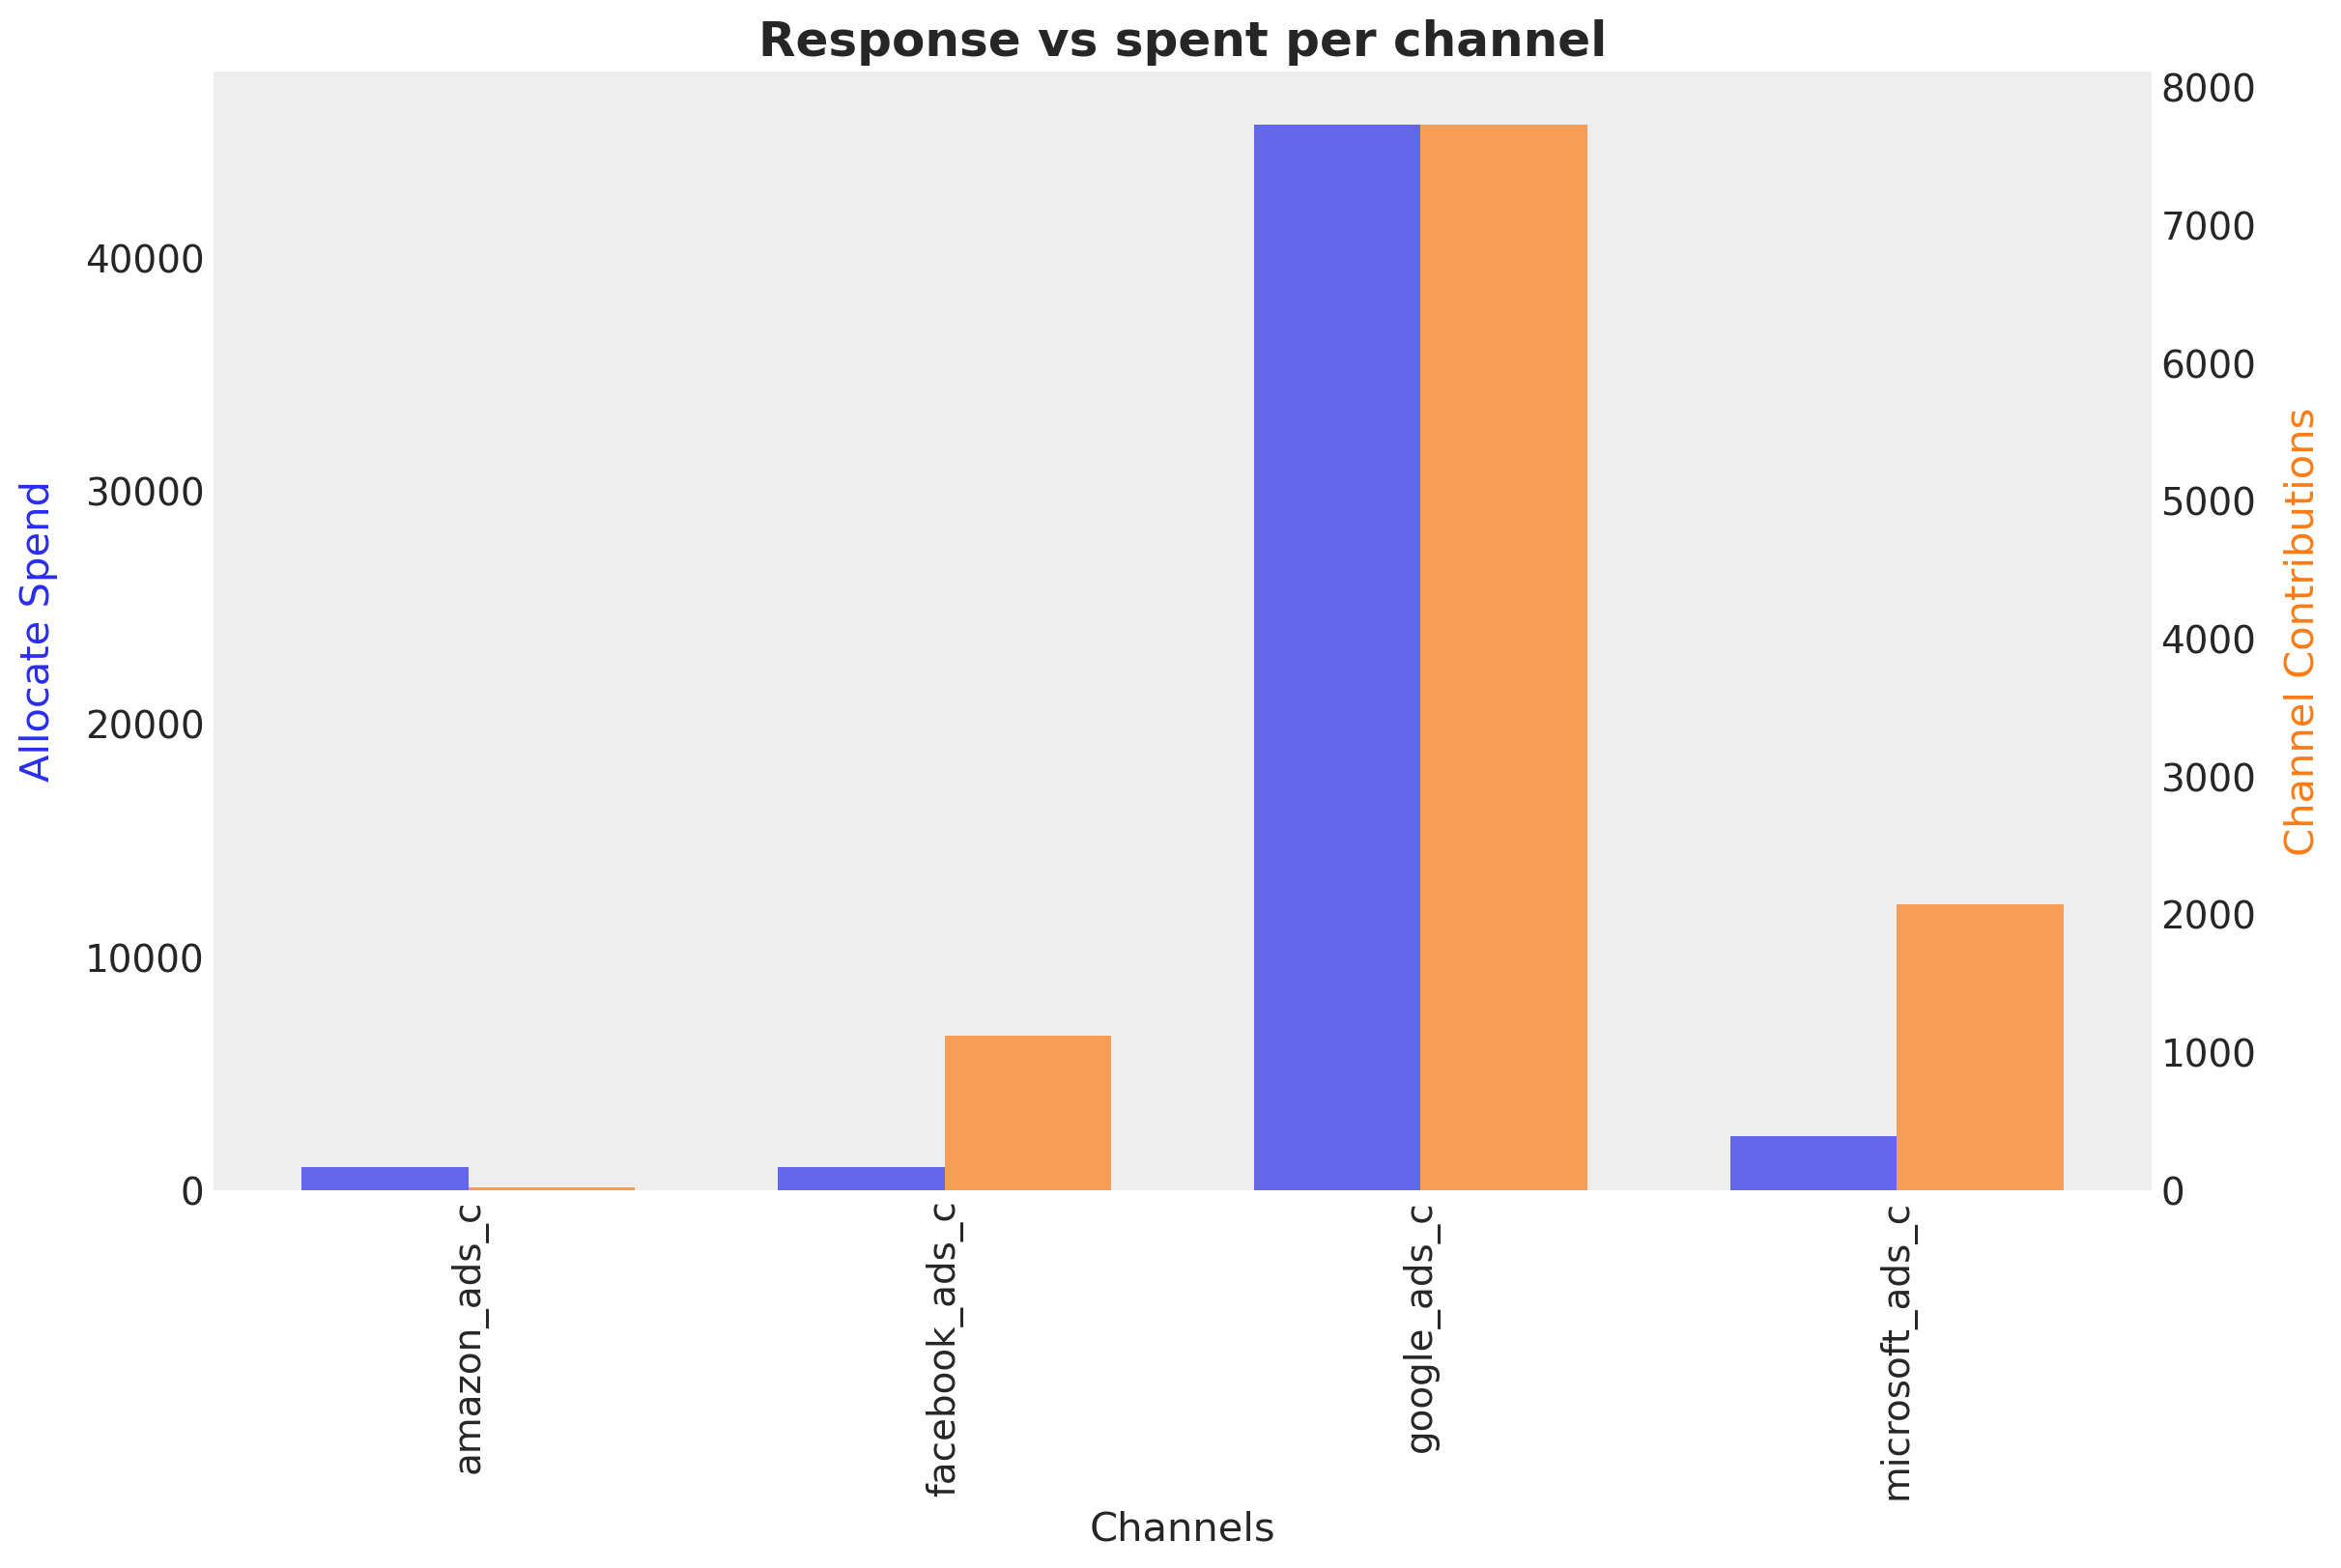

In [13]:
fig, ax = mmm.plot_budget_allocation(samples=response, figsize=(12, 8))
ax.set_title("Response vs spent per channel", fontsize=18, fontweight="bold");

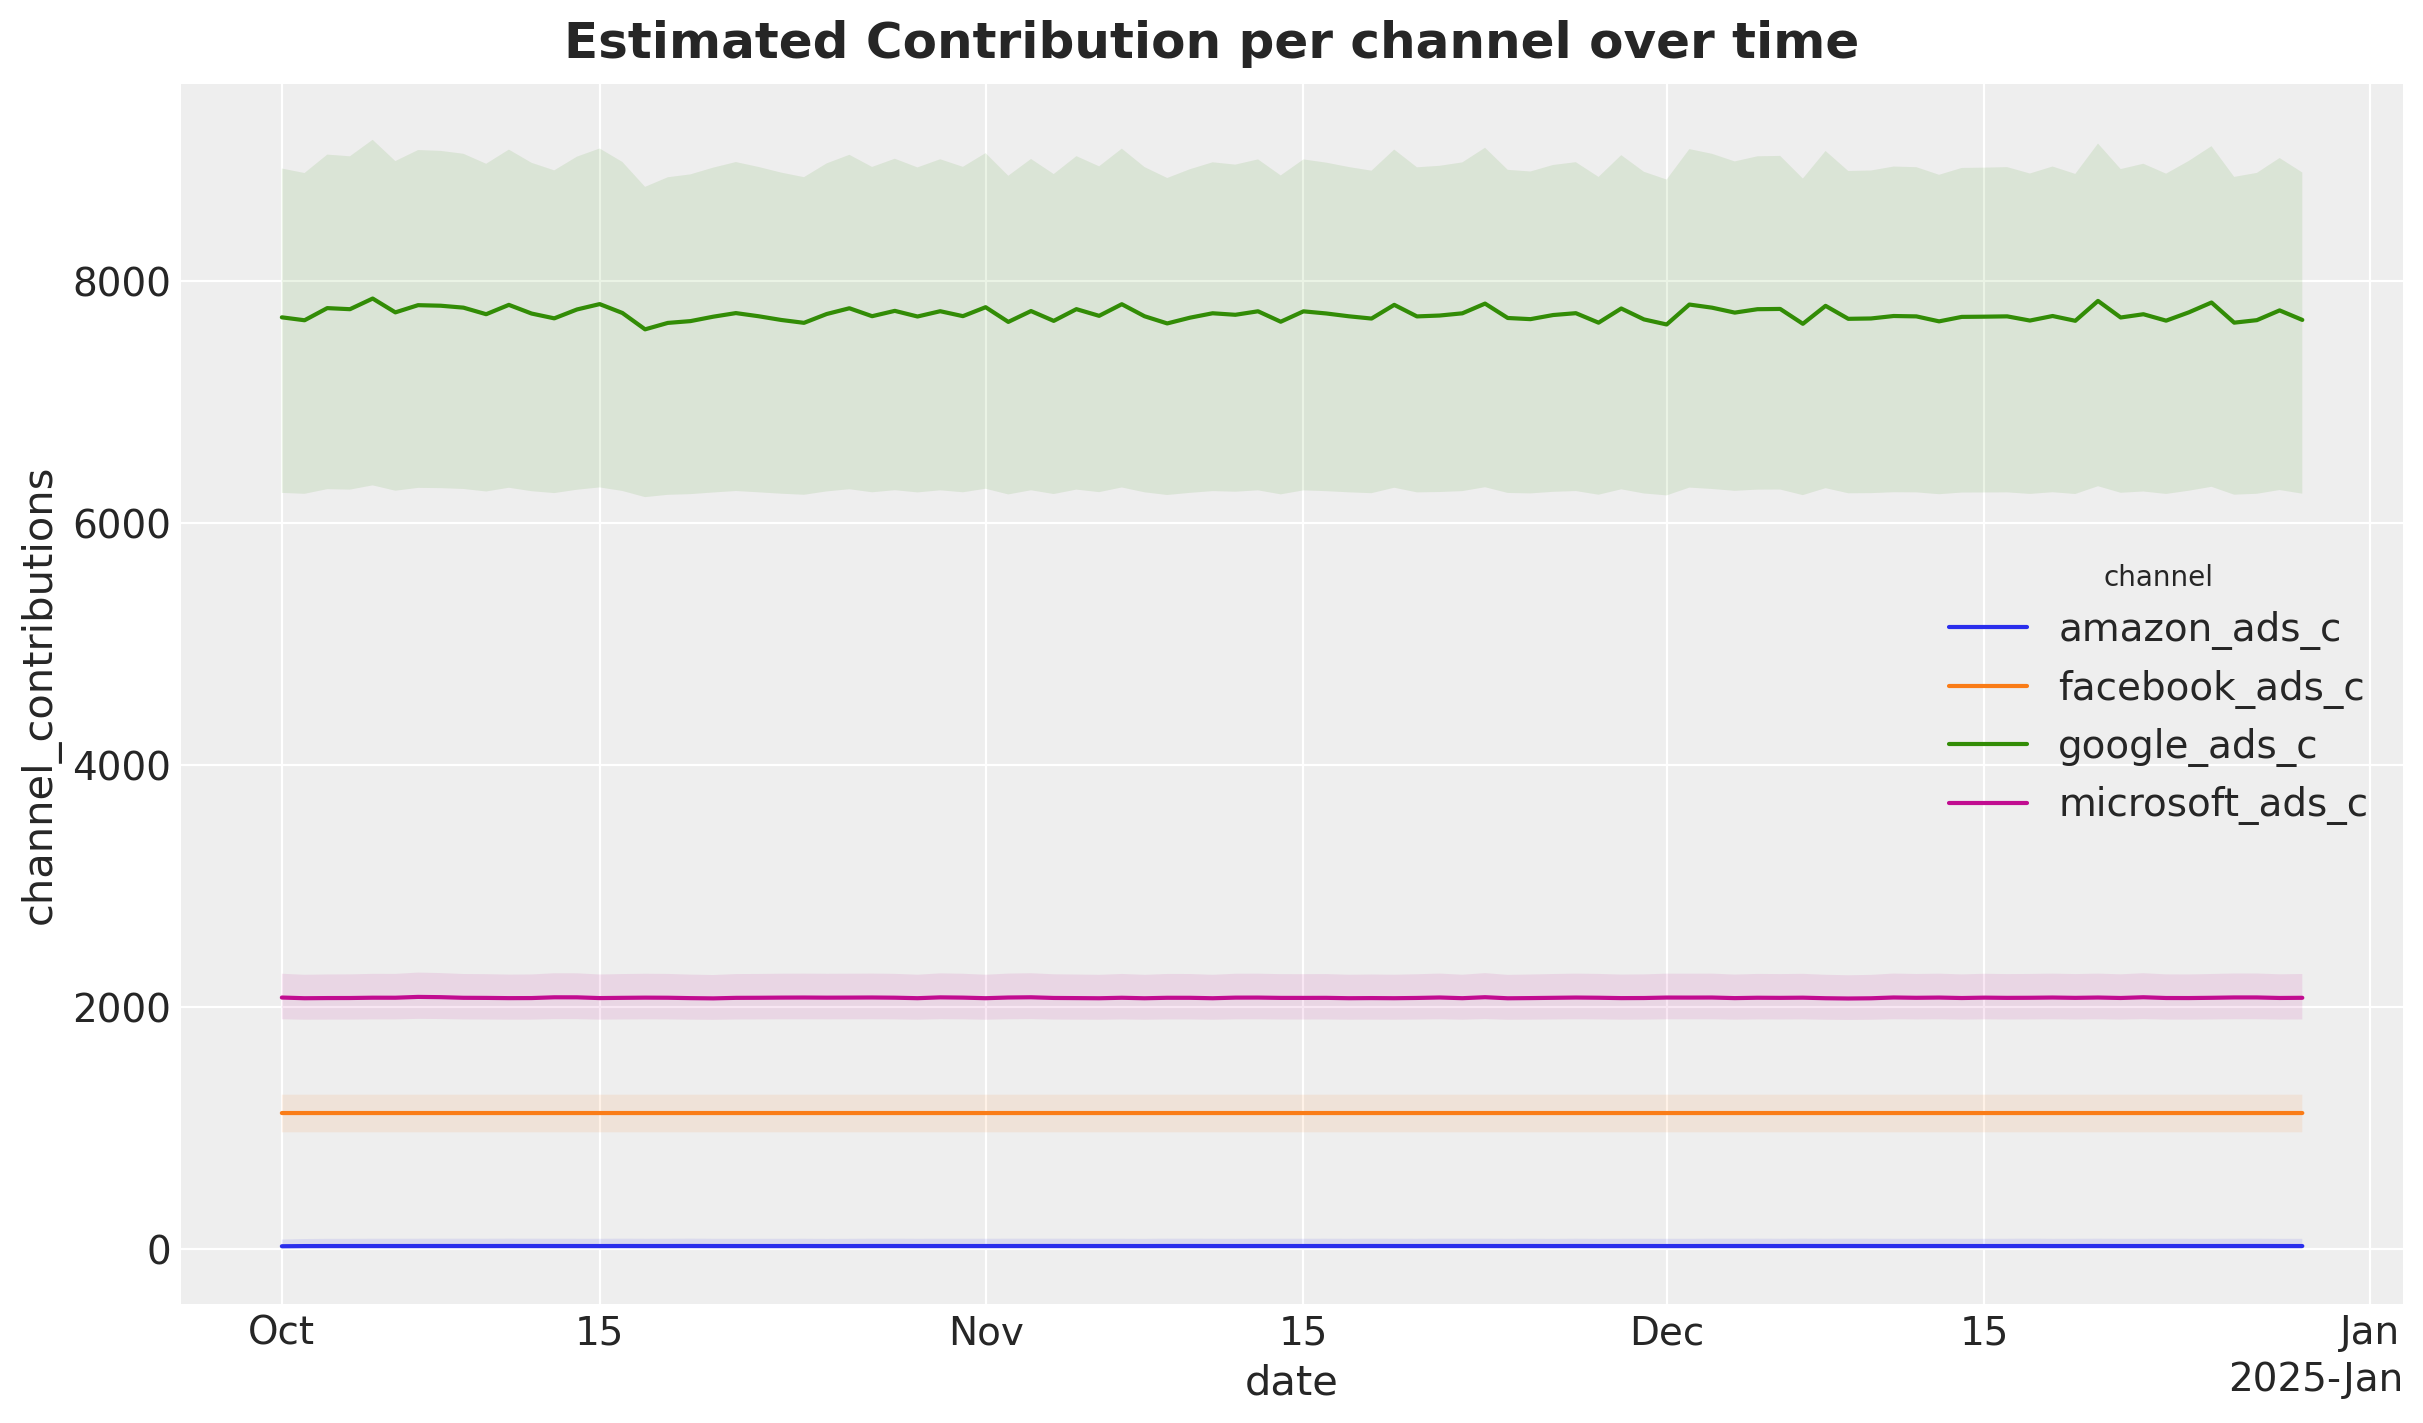

In [14]:
fig = mmm.plot_allocated_contribution_by_channel(samples=response)
fig.suptitle(
    "Estimated Contribution per channel over time", fontsize=18, fontweight="bold"
);

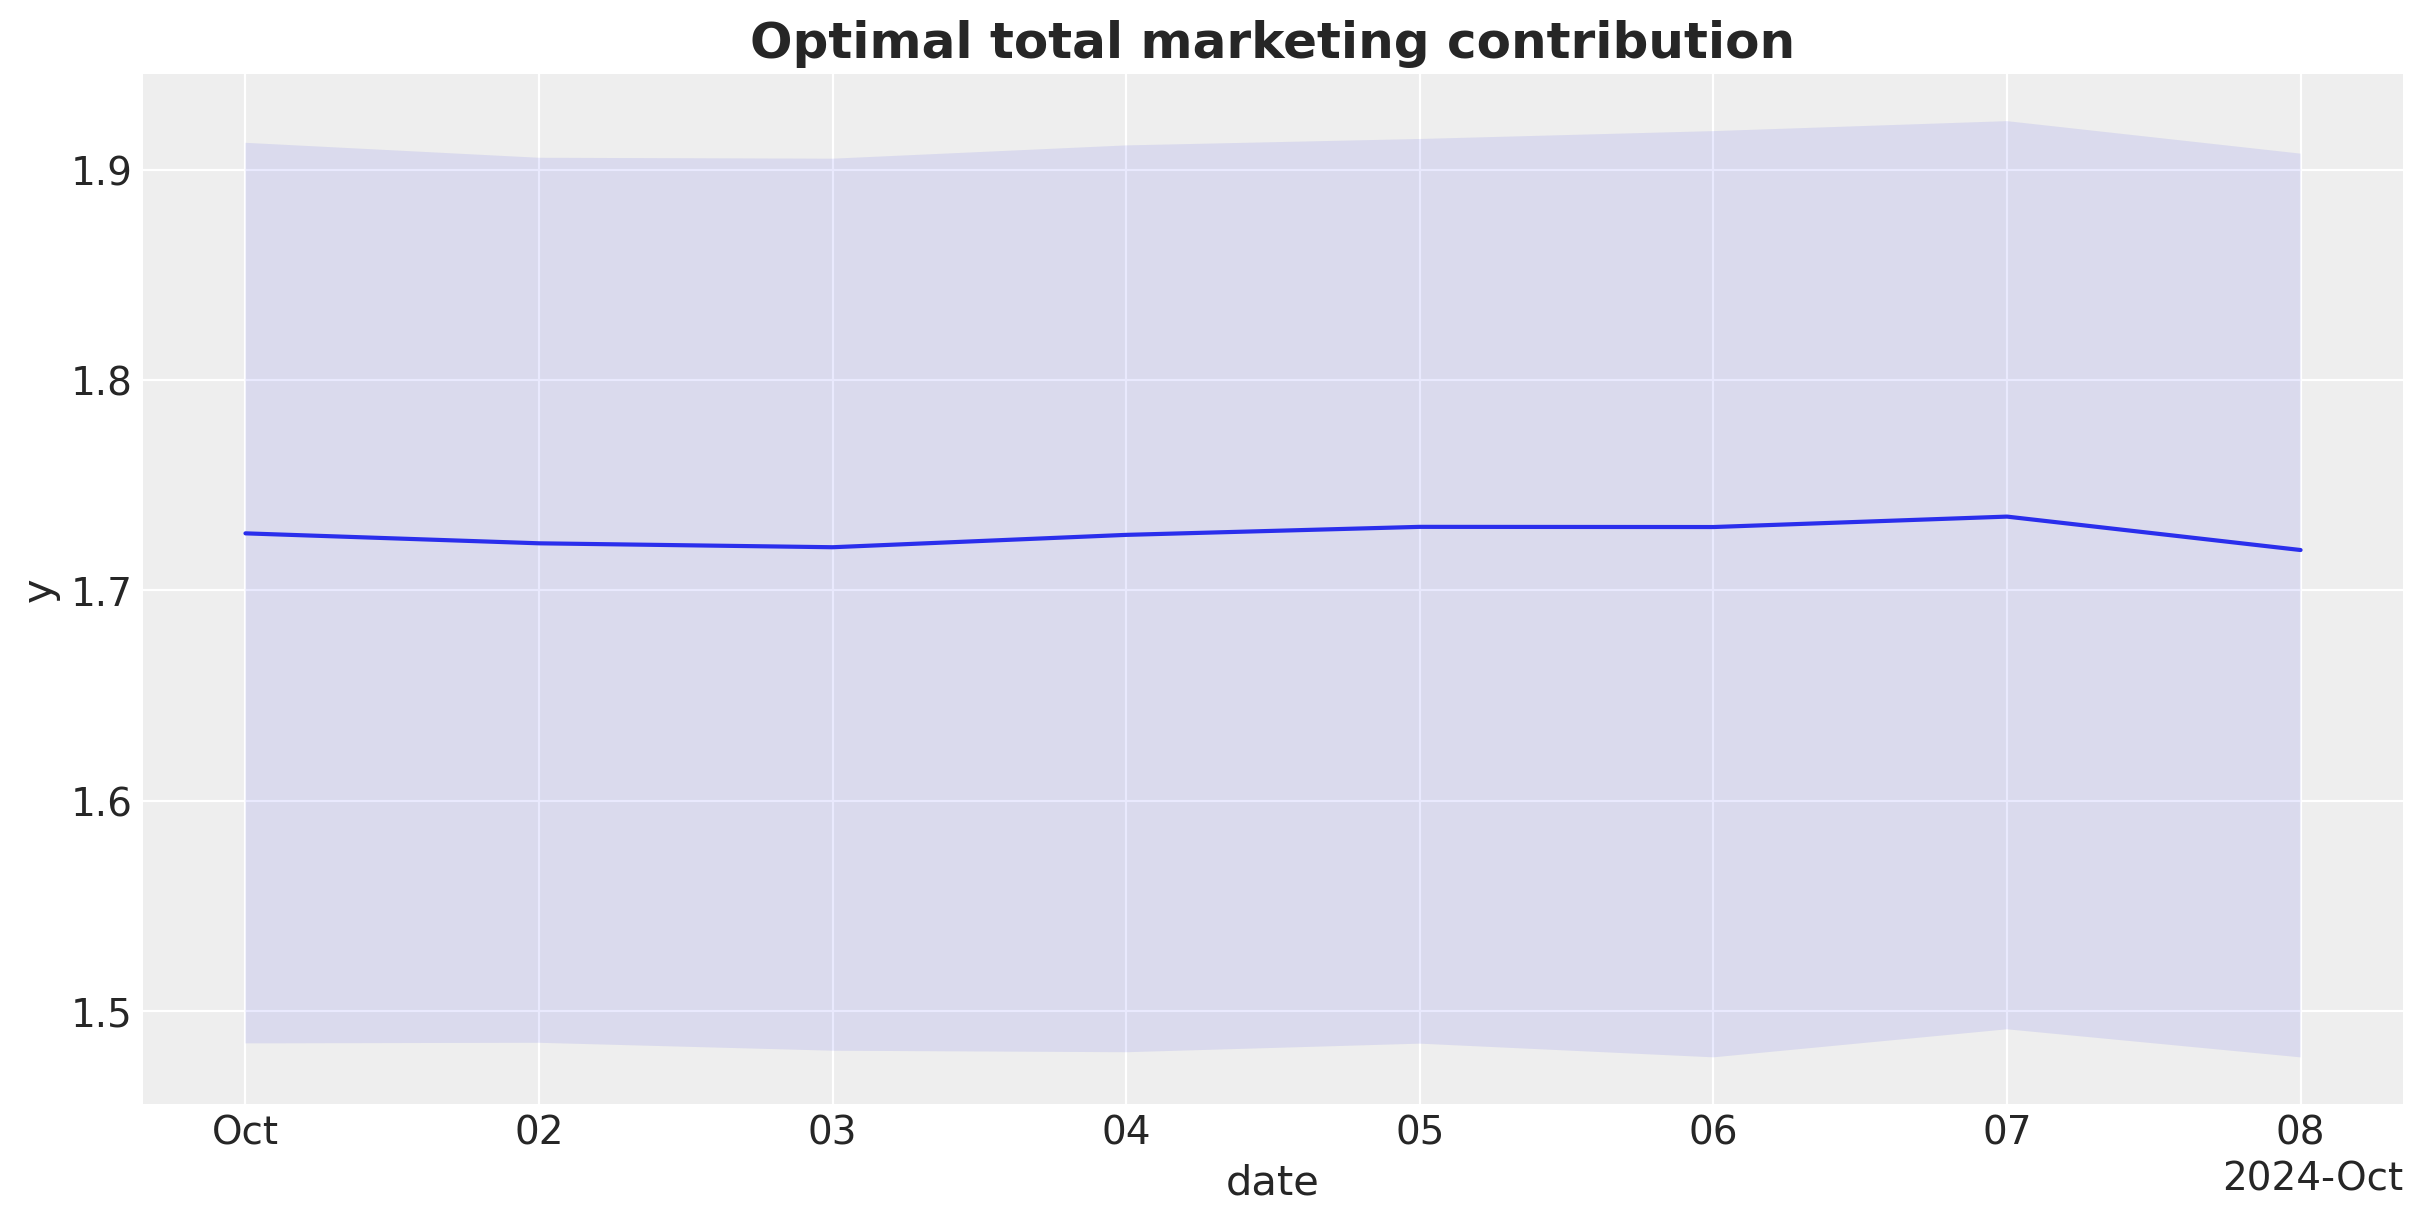

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

response["y"].mean(dim="sample").plot(ax=ax)
ax.fill_between(
    x=response.y.date.values,
    y1=response.y.quantile(0.025, dim="sample"),
    y2=response.y.quantile(0.95, dim="sample"),
    alpha=0.1,
)
ax.set_title("Optimal total marketing contribution", fontsize=18, fontweight="bold");

In [16]:
# Initialize two variables to save the results and base conditions for each scenario.
scenarios_result = []
scenarios = np.array([0.6, 0.8, 1.2, 1.8])
for scenario in scenarios:
    tmp_response = mmm.allocate_budget_to_maximize_response(
        budget=total_budget * scenario,
        num_periods=9,
        time_granularity="daily",
        budget_bounds=budget_bounds,
    )
    scenarios_result.append(tmp_response)

Sampling: [y]
Sampling: [y]
Sampling: [y]
Sampling: [y]


In [2]:
fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(15, 9), sharex=True, sharey=True, layout="constrained"
)
for i, scenario in enumerate(scenarios_result):
    row = i // 2
    col = i % 2
    _, ax = mmm.plot_budget_allocation(samples=scenario, ax=axes[row, col], color=['black', 'green'])
    ax.set_title(f"Budget Allocation for Scenario {scenarios[i] * total_budget:.0f}")

fig.suptitle(
    "Budget Allocation for Different scenarios", fontsize=18, fontweight="bold"
);

NameError: name 'plt' is not defined

{'amazon_ads_c': 13246.062954593524, 'facebook_ads_c': 13225.78036327292, 'google_ads_c': 49999.999999999985, 'microsoft_ads_c': 13528.156682133555}
